<a href="https://colab.research.google.com/github/tiwary0411/MLProjects/blob/main/Unsupervised%2BLearning%2BProject_Abhishek%2BTiwary_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Project
Name: Abhishek Tiwary


# PART-I

In [ ]:
  #import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [ ]:
#reading the dataset
car_attribute = pd.read_json('Part1 - Car-Attributes.json')
car_name = pd.read_csv('Part1 - Car name.csv')

In [ ]:
car_attribute.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [ ]:
car_attribute.shape

(398, 8)

In [ ]:
car_name.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [ ]:
car_name.shape

(398, 1)

car_attribute has all the attributes for various cars and the corresponding names (assuming) are contained in the car_name dataset. Although car names is not a numerical feature and we can use just the car_attribute data for our analysis assuming each row describes a particular car. However, as per the requirement of the question we can add car name to the car attribute dataset to create a complete dataset.

In [ ]:
car_data = pd.concat([car_name, car_attribute], axis = 1)

In [ ]:
car_data.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [ ]:
car_data.shape

(398, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


hp is a continuous variable and its datatype should be numerical. However, here we see object datatype for hp. This might be due to some non-numerical entry (hidden missing values) in the hp column.

For now we will just save a copy of the combined dataset and reload it as per the instruction given. We will deal with missing values or incorrect entry in the subsequent steps.

In [ ]:
car_data.to_csv('combined_car_data.csv', index = False)

In [ ]:
car_reload_data = pd.read_csv('combined_car_data.csv')

In [ ]:
car_reload_data.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [ ]:
car_reload_data.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
dtype: bool

Looks like there are no missing values. However, earlier we have noted down the possibility of hidden missing values in the hp column.

In [ ]:
car_reload_data.describe(include = 'all')

car_name         mpg         cyl        disp   hp           wt  \
count          398  398.000000  398.000000  398.000000  398   398.000000   
unique         305         NaN         NaN         NaN   94          NaN   
top     ford pinto         NaN         NaN         NaN  150          NaN   
freq             6         NaN         NaN         NaN   22          NaN   
mean           NaN   23.514573    5.454774  193.425879  NaN  2970.424623   
std            NaN    7.815984    1.701004  104.269838  NaN   846.841774   
min            NaN    9.000000    3.000000   68.000000  NaN  1613.000000   
25%            NaN   17.500000    4.000000  104.250000  NaN  2223.750000   
50%            NaN   23.000000    4.000000  148.500000  NaN  2803.500000   
75%            NaN   29.000000    8.000000  262.000000  NaN  3608.000000   
max            NaN   46.600000    8.000000  455.000000  NaN  5140.000000   

               acc          yr      origin  
count   398.000000  398.000000  398.000000  
unique         NaN         NaN         NaN  
top            NaN         NaN         NaN  
freq           NaN         NaN         NaN  
mean     15.568090   76.010050    1.572864  
std       2.757689    3.697627    0.802055  
min       8.000000   70.000000    1.000000  
25%      13.825000   73.000000    1.000000  
50%      15.500000   76.000000    1.000000  
75%      17.175000   79.000000    2.000000  
max      24.800000   82.000000    3.000000

The above gives a nice summary of the dataset. There are 305 unique cars. Lets us try to convert hp to numerical datatype.

In [ ]:
car_reload_data.hp = pd.to_numeric(car_reload_data.hp)

ValueError: Unable to parse string "?" at position 32

Looks like hidden missing values are codes as a ? in the hp column. We can just coerce this to NaN values. First let us check the numbers of ? in the column.

In [ ]:
sum(car_reload_data.hp == '?')

6

There are 6 missing values.

In [ ]:
car_reload_data.hp = pd.to_numeric(car_reload_data.hp, errors = 'coerce')

In [ ]:
car_reload_data.isnull().any()

car_name    False
mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
dtype: bool

Now the null values are properly getting detected in the hp column.

In [ ]:
car_reload_data['hp'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: hp, dtype: float64

In [ ]:
car_reload_data.corr()

mpg       cyl      disp        hp        wt       acc        yr  \
mpg     1.000000 -0.775396 -0.804203 -0.778427 -0.831741  0.420289  0.579267   
cyl    -0.775396  1.000000  0.950721  0.842983  0.896017 -0.505419 -0.348746   
disp   -0.804203  0.950721  1.000000  0.897257  0.932824 -0.543684 -0.370164   
hp     -0.778427  0.842983  0.897257  1.000000  0.864538 -0.689196 -0.416361   
wt     -0.831741  0.896017  0.932824  0.864538  1.000000 -0.417457 -0.306564   
acc     0.420289 -0.505419 -0.543684 -0.689196 -0.417457  1.000000  0.288137   
yr      0.579267 -0.348746 -0.370164 -0.416361 -0.306564  0.288137  1.000000   
origin  0.563450 -0.562543 -0.609409 -0.455171 -0.581024  0.205873  0.180662   

          origin  
mpg     0.563450  
cyl    -0.562543  
disp   -0.609409  
hp     -0.455171  
wt     -0.581024  
acc     0.205873  
yr      0.180662  
origin  1.000000

hp has high positive correlation with cyl, disp, wt and decent negative correlation with acc, yr, origin. mpg is highly negatively correlated to hp. We can run a mutilvariate regression analysis considering hp as the independent variable and others as predictors to get a more realistic estimate of missing hp values. But here we can keep the analysis simple and use median inputation for missing hp values. However before that let us try to see the kind of cars that have missing hp values. From domain knowledge we can just use disp variable to get a very good estimate of hp as well.

In [ ]:
car_reload_data.loc[car_reload_data.hp.isnull(),:]

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

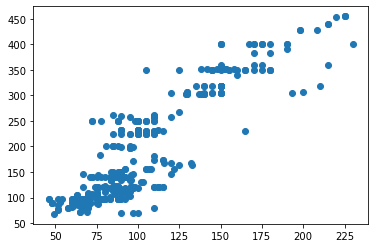

In [ ]:
plt.scatter(car_reload_data.hp, car_reload_data.disp)
plt.show()

In [ ]:
#using just disp to get a linear model to predict hp for the missing entries
hp_estimation_data = car_reload_data.loc[car_reload_data['hp'].notnull(),['disp','hp']]
hp_null_data = car_reload_data.loc[car_reload_data.hp.isnull(),:].copy()

In [ ]:
hp_estimation_data.head()

disp     hp
0  307.0  130.0
1  350.0  165.0
2  318.0  150.0
3  304.0  150.0
4  302.0  140.0

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(hp_estimation_data.disp).reshape(-1,1), np.array(hp_estimation_data.hp))

LinearRegression()

In [ ]:
hp_null_data

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

In [ ]:
values = model.predict(np.array(hp_null_data['disp']).reshape(-1,1))

In [ ]:
values

array([ 72.64979972, 106.3136416 ,  68.35931007,  86.51138167,
        73.30987505,  90.14179599])

In [ ]:
hp_null_data.loc[:,'hp'] = values

In [ ]:
hp_null_data

car_name   mpg  cyl   disp          hp    wt   acc  yr  \
32             ford pinto  25.0    4   98.0   72.649800  2046  19.0  71   
126         ford maverick  21.0    6  200.0  106.313642  2875  17.0  74   
330  renault lecar deluxe  40.9    4   85.0   68.359310  1835  17.3  80   
336    ford mustang cobra  23.6    4  140.0   86.511382  2905  14.3  80   
354           renault 18i  34.5    4  100.0   73.309875  2320  15.8  81   
374        amc concord dl  23.0    4  151.0   90.141796  3035  20.5  82   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  
374       1

In [ ]:
car_final_data =pd.concat([ car_reload_data.loc[car_reload_data['hp'].notnull(),:],hp_null_data], axis = 0)

In [ ]:
car_final_data.shape

(398, 9)

In [ ]:
car_final_data.head()

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1

In [ ]:
car_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 374
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 31.1+ KB


In [ ]:
#dropping car name as we do not need this information for further analysis
car_final_data.drop('car_name', axis = 1, inplace = True)

In [ ]:
car_final_data.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

In [ ]:
car_final_data.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.143934  2970.424623   
std      7.815984    1.701004  104.269838   38.323493   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   75.000000  2223.750000   
50%     23.000000    4.000000  148.500000   92.000000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

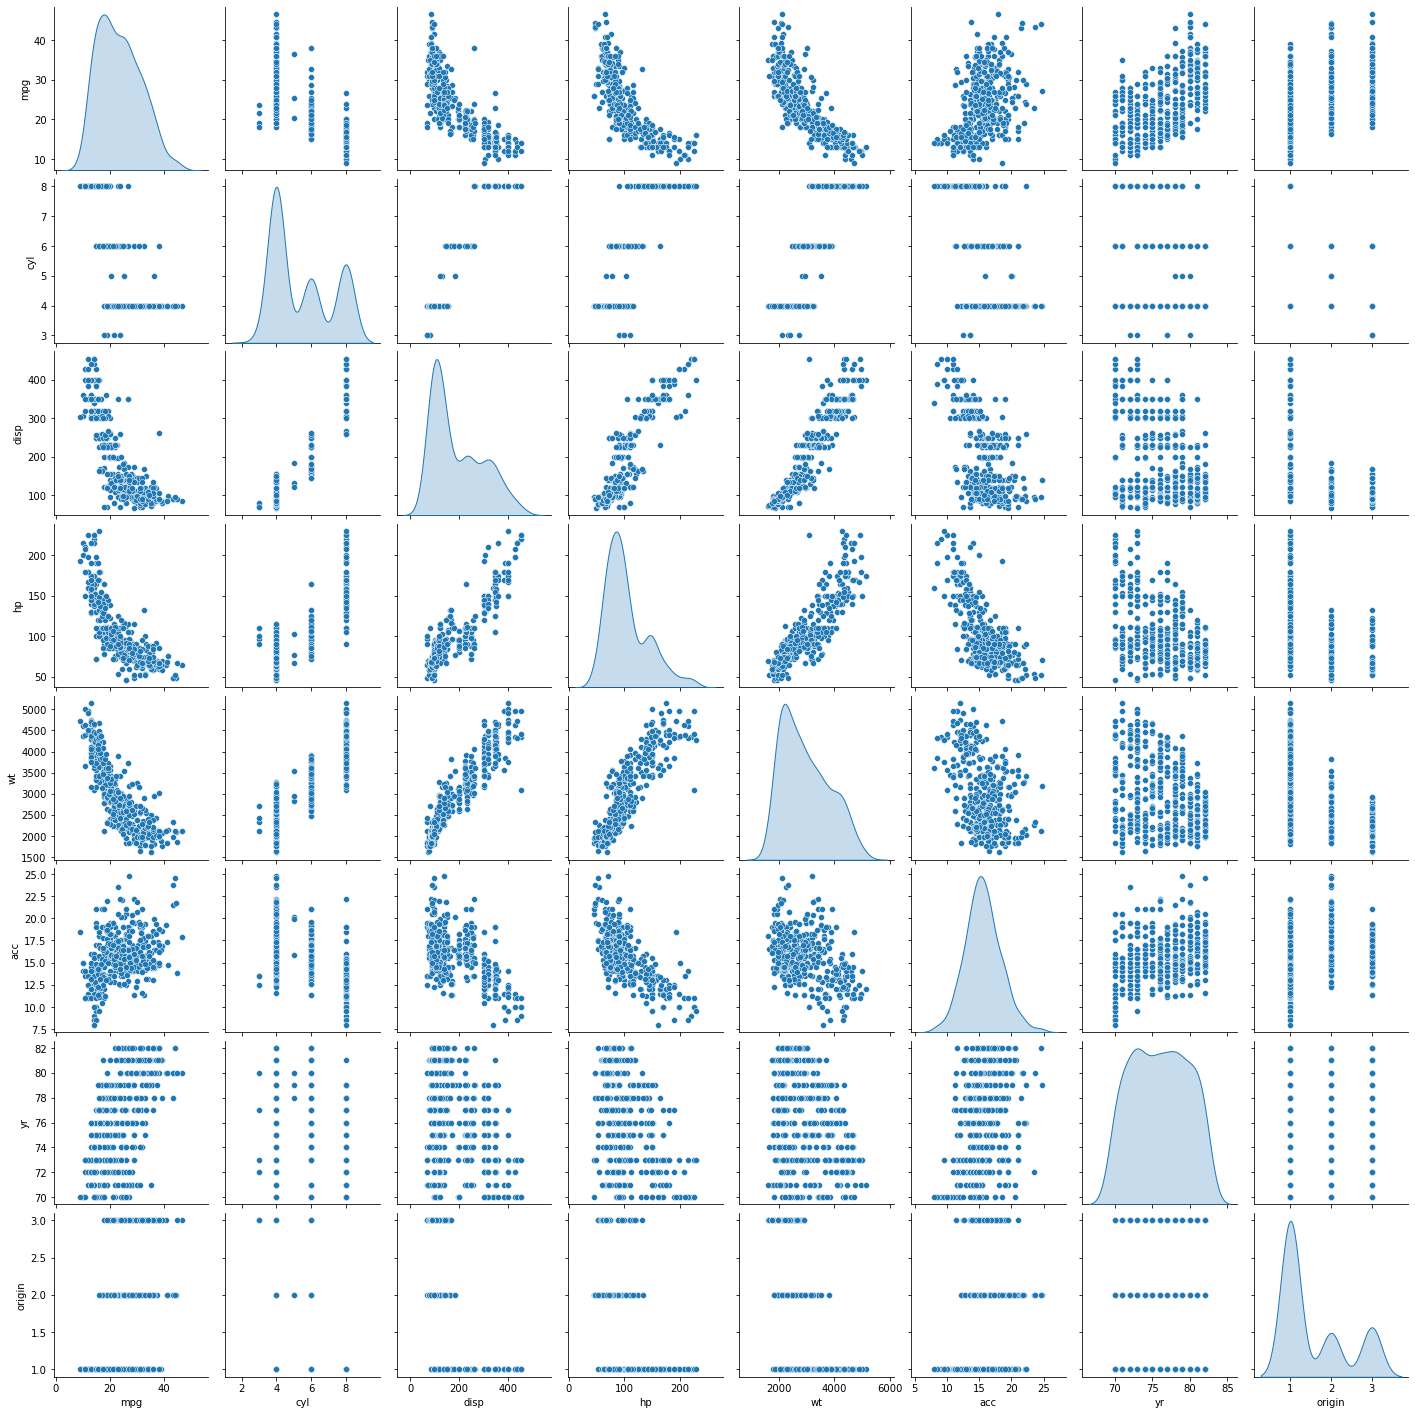

In [ ]:
sns.pairplot(car_final_data, diag_kind = 'kde');

Looking at the KDE at the diagonal, we can see that there might be 3 clusters in this dataset. The distribution of cyc, disp, and origin clearly indicates the possibility of 3 different clusters in the dataset. mpg also appears to have decent correlations with the predictor variables.

mpg has a negetive correlation with disp, hp, wt, and cyl as expected. It has some positive relation with acc, yr, and origin.

In [ ]:
#looking at the correlation coefficients
car_final_data.corr()

mpg       cyl      disp        hp        wt       acc        yr  \
mpg     1.000000 -0.775396 -0.804203 -0.777480 -0.831741  0.420289  0.579267   
cyl    -0.775396  1.000000  0.950721  0.843642  0.896017 -0.505419 -0.348746   
disp   -0.804203  0.950721  1.000000  0.897960  0.932824 -0.543684 -0.370164   
hp     -0.777480  0.843642  0.897960  1.000000  0.864827 -0.687384 -0.415672   
wt     -0.831741  0.896017  0.932824  0.864827  1.000000 -0.417457 -0.306564   
acc     0.420289 -0.505419 -0.543684 -0.687384 -0.417457  1.000000  0.288137   
yr      0.579267 -0.348746 -0.370164 -0.415672 -0.306564  0.288137  1.000000   
origin  0.563450 -0.562543 -0.609409 -0.451630 -0.581024  0.205873  0.180662   

          origin  
mpg     0.563450  
cyl    -0.562543  
disp   -0.609409  
hp     -0.451630  
wt     -0.581024  
acc     0.205873  
yr      0.180662  
origin  1.000000

In [ ]:
# scaling the data to remove the effect of units
car_final_data_scaled = car_final_data.apply(zscore)

In [ ]:
car_final_data_scaled.describe()

mpg           cyl          disp            hp            wt  \
count  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02   
mean   2.505673e-16 -5.640379e-16 -8.633518e-17  1.008406e-16 -8.448714e-17   
std    1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00   
min   -1.859374e+00 -1.444949e+00 -1.204411e+00 -1.519097e+00 -1.604943e+00   
25%   -7.704907e-01 -8.563206e-01 -8.563178e-01 -7.614289e-01 -8.828266e-01   
50%   -6.591883e-02 -8.563206e-01 -4.314040e-01 -3.172785e-01 -1.973624e-01   
75%    7.027050e-01  1.498191e+00  6.584879e-01  5.448960e-01  7.538337e-01   
max    2.957335e+00  1.498191e+00  2.511784e+00  3.288178e+00  2.565185e+00   

                acc            yr        origin  
count  3.980000e+02  3.980000e+02  3.980000e+02  
mean   7.754824e-17 -9.177472e-16 -4.613841e-16  
std    1.001259e+00  1.001259e+00  1.001259e+00  
min   -2.747814e+00 -1.627426e+00 -7.151448e-01  
25%   -6.328794e-01 -8.150739e-01 -7.151448e-01  
50%   -2.472221e-02 -2.721449e-03 -7.151448e-01  
75%    5.834349e-01  8.096310e-01  5.332220e-01  
max    3.351912e+00  1.621983e+00  1.781589e+00

In [ ]:
car_final_data_scaled.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.675528  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.589956  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.198058  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.198058  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.936793  0.565841 -1.840117 -1.627426   

     origin  
0 -0.715145  
1 -0.715145  
2 -0.715145  
3 -0.715145  
4 -0.715145

# K-mens clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

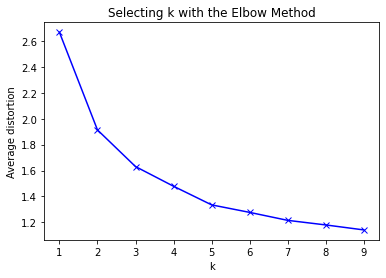

In [ ]:
#Finding the optimum number of k
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_final_data_scaled)
    prediction=model.predict(car_final_data_scaled)
    meanDistortions.append(sum(np.min(cdist(car_final_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_final_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

We do not see a clear bend. K=3 or K=5 might be optimal. From our earlier analysis we have guessed that there might be three clusters in the data.

In [ ]:
#Let us select K=3 and see how the clusters looks like
final_model=KMeans(3)
final_model.fit(car_final_data_scaled)
prediction=final_model.predict(car_final_data_scaled)

#Append the prediction
car_final_data["cluster"] = prediction
car_final_data_scaled["cluster"] = prediction
car_final_data.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  cluster
0  18.0    8  307.0  130.0  3504  12.0  70       1        1
1  15.0    8  350.0  165.0  3693  11.5  70       1        1
2  18.0    8  318.0  150.0  3436  11.0  70       1        1
3  16.0    8  304.0  150.0  3433  12.0  70       1        1
4  17.0    8  302.0  140.0  3449  10.5  70       1        1

In [ ]:
car_final_cluster = car_final_data.groupby(['cluster'])
car_final_cluster.mean()

mpg       cyl        disp          hp           wt        acc  \
cluster                                                                       
0        21.69562  5.240876  187.558394   94.763625  2990.861314  16.772263   
1        14.71500  7.980000  346.370000  160.550000  4126.910000  12.721000   
2        30.52795  4.068323  103.422360   77.091113  2234.720497  16.311801   

                yr    origin  
cluster                       
0        76.313869  1.087591  
1        73.750000  1.000000  
2        77.155280  2.341615

The three groups are quite intuitive. Group-2 are probably smaller cars with high mpg. Group-1 appears to be high hp cars with low mpg and Group-0 is somewhere in between the two. (Assumption could be Group-0: Sedans Group-1: SUVs Group-2: hatchbacks). We can have three different liner regression models for these 3 groups to predict mpg.

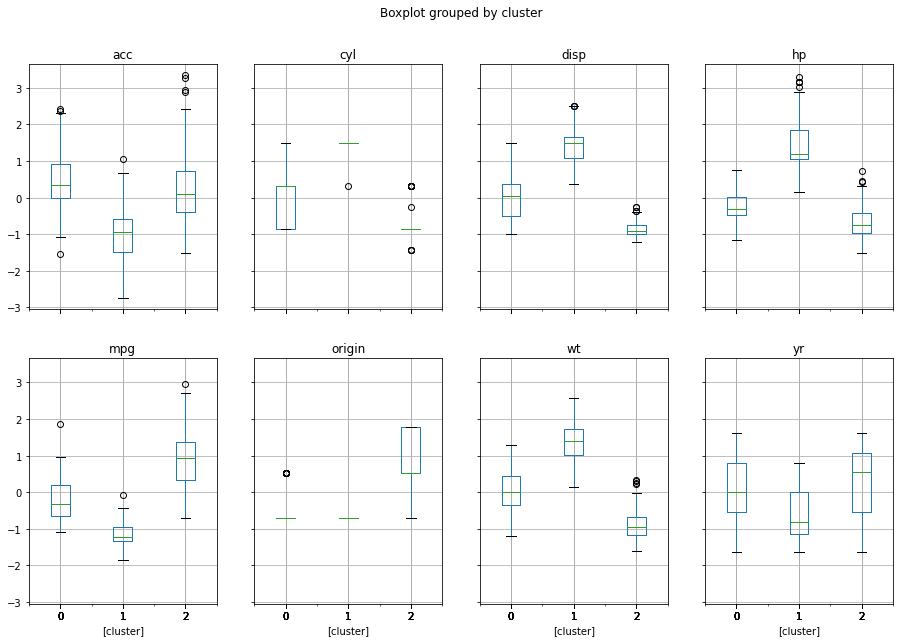

In [ ]:
car_final_data_scaled.boxplot(by='cluster', layout = (2,4),figsize=(15,10));

# Hierarchical Clustering

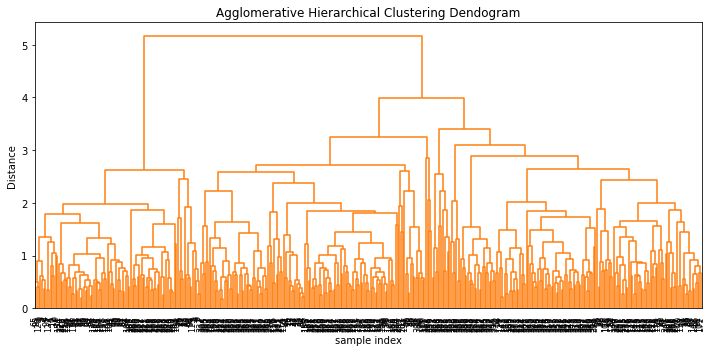

In [ ]:
#Usinf dendograms to visualize the possible clusters in the data
Z = linkage(car_final_data_scaled, metric='euclidean', method='average')
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

From the above dendogram, we can see that if we cut the dendogram at a distance of around 3.5 we get three clear clusters. After this the clusters are closer to each other.

In [ ]:
# Final clustering considering 3 clusters in the data
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(car_final_data_scaled)
car_final_data["cluster_hierarchical"] = model.labels_

In [ ]:
car_final_data.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  cluster  \
0  18.0    8  307.0  130.0  3504  12.0  70       1        1   
1  15.0    8  350.0  165.0  3693  11.5  70       1        1   
2  18.0    8  318.0  150.0  3436  11.0  70       1        1   
3  16.0    8  304.0  150.0  3433  12.0  70       1        1   
4  17.0    8  302.0  140.0  3449  10.5  70       1        1   

   cluster_hierarchical  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [ ]:
car_final_cluster_h = car_final_data.groupby(['cluster_hierarchical'])
car_final_cluster_h.mean()

mpg       cyl        disp          hp  \
cluster_hierarchical                                                
0                     30.527950  4.068323  103.422360   77.091113   
1                     14.631313  7.979798  346.333333  160.909091   
2                     21.705072  5.260870  188.735507   94.982729   

                               wt        acc         yr    origin   cluster  
cluster_hierarchical                                                         
0                     2234.720497  16.311801  77.155280  2.341615  2.000000  
1                     4129.202020  12.673737  73.696970  1.000000  1.000000  
2                     2997.449275  16.776812  76.333333  1.086957  0.007246

Hence, from hierarchical cluster we can see very similar clusters as previously obtained using K-means. Here, Group-0 appears to be hatchbacks, Group-1 appears to be SUVs, and Group-2 can be Sedans.

In K-means clustering we need to define the number of clusters in advance but in hierarchical clustering we can run the algorithm to get all possible clusters and then can use the dendograms to make a final decision regarding the number of clusters in the data. K-means is computationally less expensive as we need not find all pairwise distance as in hierarchical clustering algorithm.

From both K-means clustering methond and hierarchical clustering method we can see that there are 3 clusters in the data and we can justify the same using domain knowledge as well.

In [ ]:
#creating separate dataset for each cluster to fit a liner regression model
#using cluster tags from K-means cluster
#target variable is mpg
car_0 = car_final_data.loc[car_final_data['cluster']==0,:]
car_1 = car_final_data.loc[car_final_data['cluster']==1,:]
car_2 = car_final_data.loc[car_final_data['cluster']==2,:]

In [ ]:
print(car_0.shape,car_1.shape,car_2.shape)

(137, 10) (100, 10) (161, 10)


In [ ]:
car_0.head()

mpg  cyl   disp    hp    wt   acc  yr  origin  cluster  \
15  22.0    6  198.0  95.0  2833  15.5  70       1        0   
16  18.0    6  199.0  97.0  2774  15.5  70       1        0   
17  21.0    6  200.0  85.0  2587  16.0  70       1        0   
24  21.0    6  199.0  90.0  2648  15.0  70       1        0   
30  28.0    4  140.0  90.0  2264  15.5  71       1        0   

    cluster_hierarchical  
15                     2  
16                     2  
17                     2  
24                     2  
30                     2

In [ ]:
car_1.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  cluster  \
0  18.0    8  307.0  130.0  3504  12.0  70       1        1   
1  15.0    8  350.0  165.0  3693  11.5  70       1        1   
2  18.0    8  318.0  150.0  3436  11.0  70       1        1   
3  16.0    8  304.0  150.0  3433  12.0  70       1        1   
4  17.0    8  302.0  140.0  3449  10.5  70       1        1   

   cluster_hierarchical  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [ ]:
car_2.head()

mpg  cyl   disp    hp    wt   acc  yr  origin  cluster  \
14  24.0    4  113.0  95.0  2372  15.0  70       3        2   
18  27.0    4   97.0  88.0  2130  14.5  70       3        2   
19  26.0    4   97.0  46.0  1835  20.5  70       2        2   
20  25.0    4  110.0  87.0  2672  17.5  70       2        2   
21  24.0    4  107.0  90.0  2430  14.5  70       2        2   

    cluster_hierarchical  
14                     0  
18                     0  
19                     0  
20                     0  
21                     0

In [ ]:
#Linear regression model on the complete dataset
x = car_final_data.drop(['mpg','cluster', 'cluster_hierarchical'], axis=1)
y = car_final_data[['mpg']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
intercept = regression_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))
print('Train Score = ',regression_model.score(x_train, y_train))
print('Test Score = ',regression_model.score(x_test, y_test))

The coefficient for cyl is -0.226200161987739
The coefficient for disp is 0.01331552145475368
The coefficient for hp is -0.013118787949421755
The coefficient for wt is -0.006355992948696606
The coefficient for acc is 0.06393699741840508
The coefficient for yr is 0.7418764032148752
The coefficient for origin is 1.3368722934570283
The intercept for our model is -17.224192996189792
Train Score =  0.8186287813006726
Test Score =  0.8235935338866123


In [ ]:
#Linear regression model on the Group-0
x_0 = car_0.drop(['mpg','cluster', 'cluster_hierarchical'], axis=1)
y_0 = car_0[['mpg']]
x_train, x_test, y_train, y_test = train_test_split(x_0, y_0, test_size=0.2, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
intercept = regression_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))
print('Train Score = ',regression_model.score(x_train, y_train))
print('Test Score = ',regression_model.score(x_test, y_test))

The coefficient for cyl is 0.03871796652327957
The coefficient for disp is 0.005148809884411932
The coefficient for hp is -0.08522788212161356
The coefficient for wt is -0.004646759771040276
The coefficient for acc is -0.28359895146226494
The coefficient for yr is 0.6635367365872565
The coefficient for origin is 0.2317893135451139
The intercept for our model is -3.536784888862467
Train Score =  0.6788586463930372
Test Score =  0.5770742165806702


In [ ]:
#Linear regression model on the Group-1
x_1 = car_1.drop(['mpg','cluster', 'cluster_hierarchical'], axis=1)
y_1 = car_1[['mpg']]
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
intercept = regression_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))
print('Train Score = ',regression_model.score(x_train, y_train))
print('Test Score = ',regression_model.score(x_test, y_test))

The coefficient for cyl is -0.6192613330208067
The coefficient for disp is 0.010383539058349142
The coefficient for hp is -0.02802950173574345
The coefficient for wt is -0.002262405806536481
The coefficient for acc is -0.1616064759872331
The coefficient for yr is 0.37274888904698694
The coefficient for origin is 0.0
The intercept for our model is 4.526939698125991
Train Score =  0.5371962287280085
Test Score =  0.7683319304243532


In [ ]:
#Linear regression model on the Group-2
x_2 = car_2.drop(['mpg','cluster', 'cluster_hierarchical'], axis=1)
y_2 = car_2[['mpg']]
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
intercept = regression_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))
print('Train Score = ',regression_model.score(x_train, y_train))
print('Test Score = ',regression_model.score(x_test, y_test))

The coefficient for cyl is 1.6009239754932216
The coefficient for disp is 0.003055435110669722
The coefficient for hp is -0.04875779321764176
The coefficient for wt is -0.007190047112815707
The coefficient for acc is 0.3193234523771825
The coefficient for yr is 0.9616727767125912
The coefficient for origin is -0.2708252815114887
The intercept for our model is -35.41997014726353
Train Score =  0.6612226116996521
Test Score =  0.6740816887374266


Although separate models for various clusters are sometimes useful to improve performance as the model can be made as per the specific characteristics of each group and thus can give better preidction. However, here we can see that both test and train performacne has gone down as compared to the base model (one combined model). This may be due to very few data points in each cluster.

The quantity of data is very less for any machine learning model. Although the overall data quality is decent. There were very few missing values but they were hidden. Non-standard coding for missing values must be avoided or called out as this may create problems in subsequent data analysis.

# PART-II

In [ ]:
wine_data = pd.read_excel('Part2 - Company.xlsx')

In [ ]:
wine_data.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [ ]:
wine_data['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

Let us try using K-Means Clustering on the given dataset with K=2 (We need two groups that is high and low quality). But before that let us see a pair plot of the attributes to get a basic sense of the data.

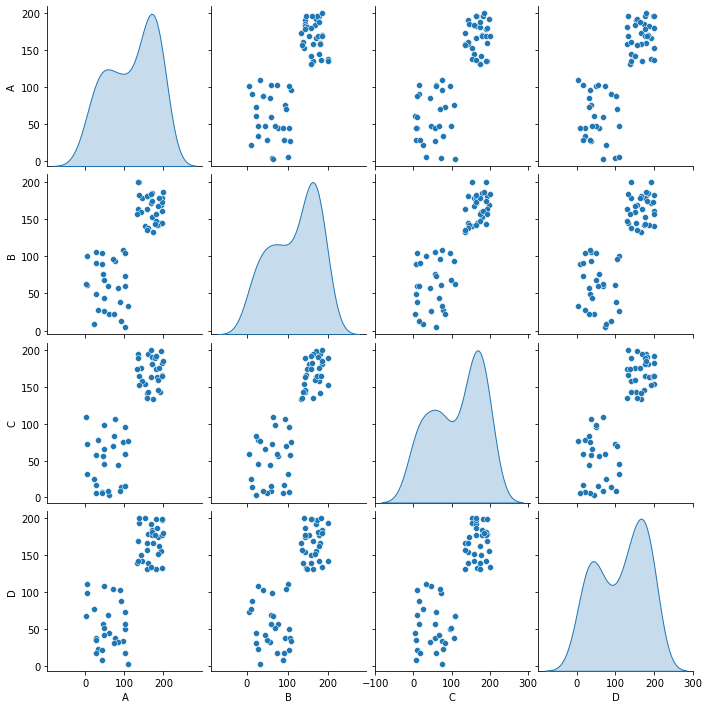

In [ ]:
sns.pairplot(wine_data, diag_kind = 'kde');

The pair plot clearly indicates the presence of two clusters in the dataset.

In [ ]:
wine_cluster_data = wine_data.drop(['Quality'], axis = 1)
wine_cluster_data_scaled = wine_cluster_data.apply(zscore)

# K-Means clustering with K=2
cluster_model=KMeans(2)
cluster_model.fit(wine_cluster_data_scaled)
prediction=cluster_model.predict(wine_cluster_data_scaled)

#Append the prediction
wine_data["cluster"] = prediction

In [ ]:
pd.crosstab(wine_data['Quality'], wine_data['cluster'])

cluster     0   1
Quality          
Quality A  26   0
Quality B   0  17

There is a clear mapping. Cluster:0 ---> Quality A and Cluster:1 ---> Quality B

For all missing target enteries, we can use cluster column to generate synthetic data. We can enter Quality A for Cluster-0 and Quality B for Cluster-1 where ever there is a missing value.

In [ ]:
sum((wine_data['Quality'].isnull()) & (wine_data['cluster']==0))

2

In [ ]:
sum((wine_data['Quality'].isnull()) & (wine_data['cluster']==1))

16

In [ ]:
wine_data.loc[(wine_data['Quality'].isnull()) & (wine_data['cluster']==0),'Quality'] = 'Quality A'

In [ ]:
wine_data.loc[(wine_data['Quality'].isnull()) & (wine_data['cluster']==1),'Quality'] = 'Quality B'

In [ ]:
wine_data['Quality'].value_counts()

Quality B    33
Quality A    28
Name: Quality, dtype: int64

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  61 non-null     object
 5   cluster  61 non-null     int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 2.7+ KB


Thus, synthetic data generated for missing values in the Quality column.

# PART-III

In [ ]:
vehicle_data = pd.read_csv('Part3 - vehicle.csv')

In [ ]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [ ]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
vehicle_data.shape

(846, 19)

In [ ]:
vehicle_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [ ]:
vehicle_data.describe(include = 'all')

compactness  circularity  distance_circularity  radius_ratio  \
count    846.000000   841.000000            842.000000    840.000000   
unique          NaN          NaN                   NaN           NaN   
top             NaN          NaN                   NaN           NaN   
freq            NaN          NaN                   NaN           NaN   
mean      93.678487    44.828775             82.110451    168.888095   
std        8.234474     6.152172             15.778292     33.520198   
min       73.000000    33.000000             40.000000    104.000000   
25%       87.000000    40.000000             70.000000    141.000000   
50%       93.000000    44.000000             80.000000    167.000000   
75%      100.000000    49.000000             98.000000    195.000000   
max      119.000000    59.000000            112.000000    333.000000   

        pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count             844.000000               846.000000     845.000000   
unique                   NaN                      NaN            NaN   
top                      NaN                      NaN            NaN   
freq                     NaN                      NaN            NaN   
mean               61.678910                 8.567376     168.901775   
std                 7.891463                 4.601217      33.214848   
min                47.000000                 2.000000     112.000000   
25%                57.000000                 7.000000     147.000000   
50%                61.000000                 8.000000     157.000000   
75%                65.000000                10.000000     198.000000   
max               138.000000                55.000000     265.000000   

        elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      845.000000              843.000000                 846.000000   
unique            NaN                     NaN                        NaN   
top               NaN                     NaN                        NaN   
freq              NaN                     NaN                        NaN   
mean        40.933728               20.582444                 147.998818   
std          7.816186                2.592933                  14.515652   
min         26.000000               17.000000                 118.000000   
25%         33.000000               19.000000                 137.000000   
50%         43.000000               20.000000                 146.000000   
75%         46.000000               23.000000                 159.000000   
max         61.000000               29.000000                 188.000000   

        scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count        843.000000         844.000000                 844.000000   
unique              NaN                NaN                        NaN   
top                 NaN                NaN                        NaN   
freq                NaN                NaN                        NaN   
mean         188.631079         439.494076                 174.709716   
std           31.411004         176.666903                  32.584808   
min          130.000000         184.000000                 109.000000   
25%          167.000000         318.000000                 149.000000   
50%          179.000000         363.500000                 173.500000   
75%          217.000000         587.000000                 198.000000   
max          320.000000        1018.000000                 268.000000   

        scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                    842.000000      840.000000        845.000000   
unique                          NaN             NaN               NaN   
top                             NaN             NaN               NaN   
freq                            NaN             NaN               NaN   
mean                      72.447743        6.364286         12.602367   
std                        7.486190        4.92064

Except the target variable (class), all other are numeric features.

In [ ]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are missing values in almost all features except a few. We will use mean imputatation for all numeric features.

In [ ]:
x = vehicle_data.drop(['class'], axis = 1)
y = vehicle_data['class']

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
transformed_x = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)

In [ ]:
transformed_x.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
dtype: bool

In [ ]:
transformed_x.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

In [ ]:
vehicle_final = pd.concat([transformed_x, y], axis = 1)

In [ ]:
vehicle_final.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0          197.0   van  
1             189.0          199.0   van  
2             188.0          196.0   car  
3             199.0          207.0   van  
4             180.0          183.0   bus

In [ ]:
vehicle_final.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [ ]:
vehicle_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
vehicle_final['class'] = vehicle_final['class'].astype('category')

In [ ]:
vehicle_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    float64 
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    float64 
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    float64 
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

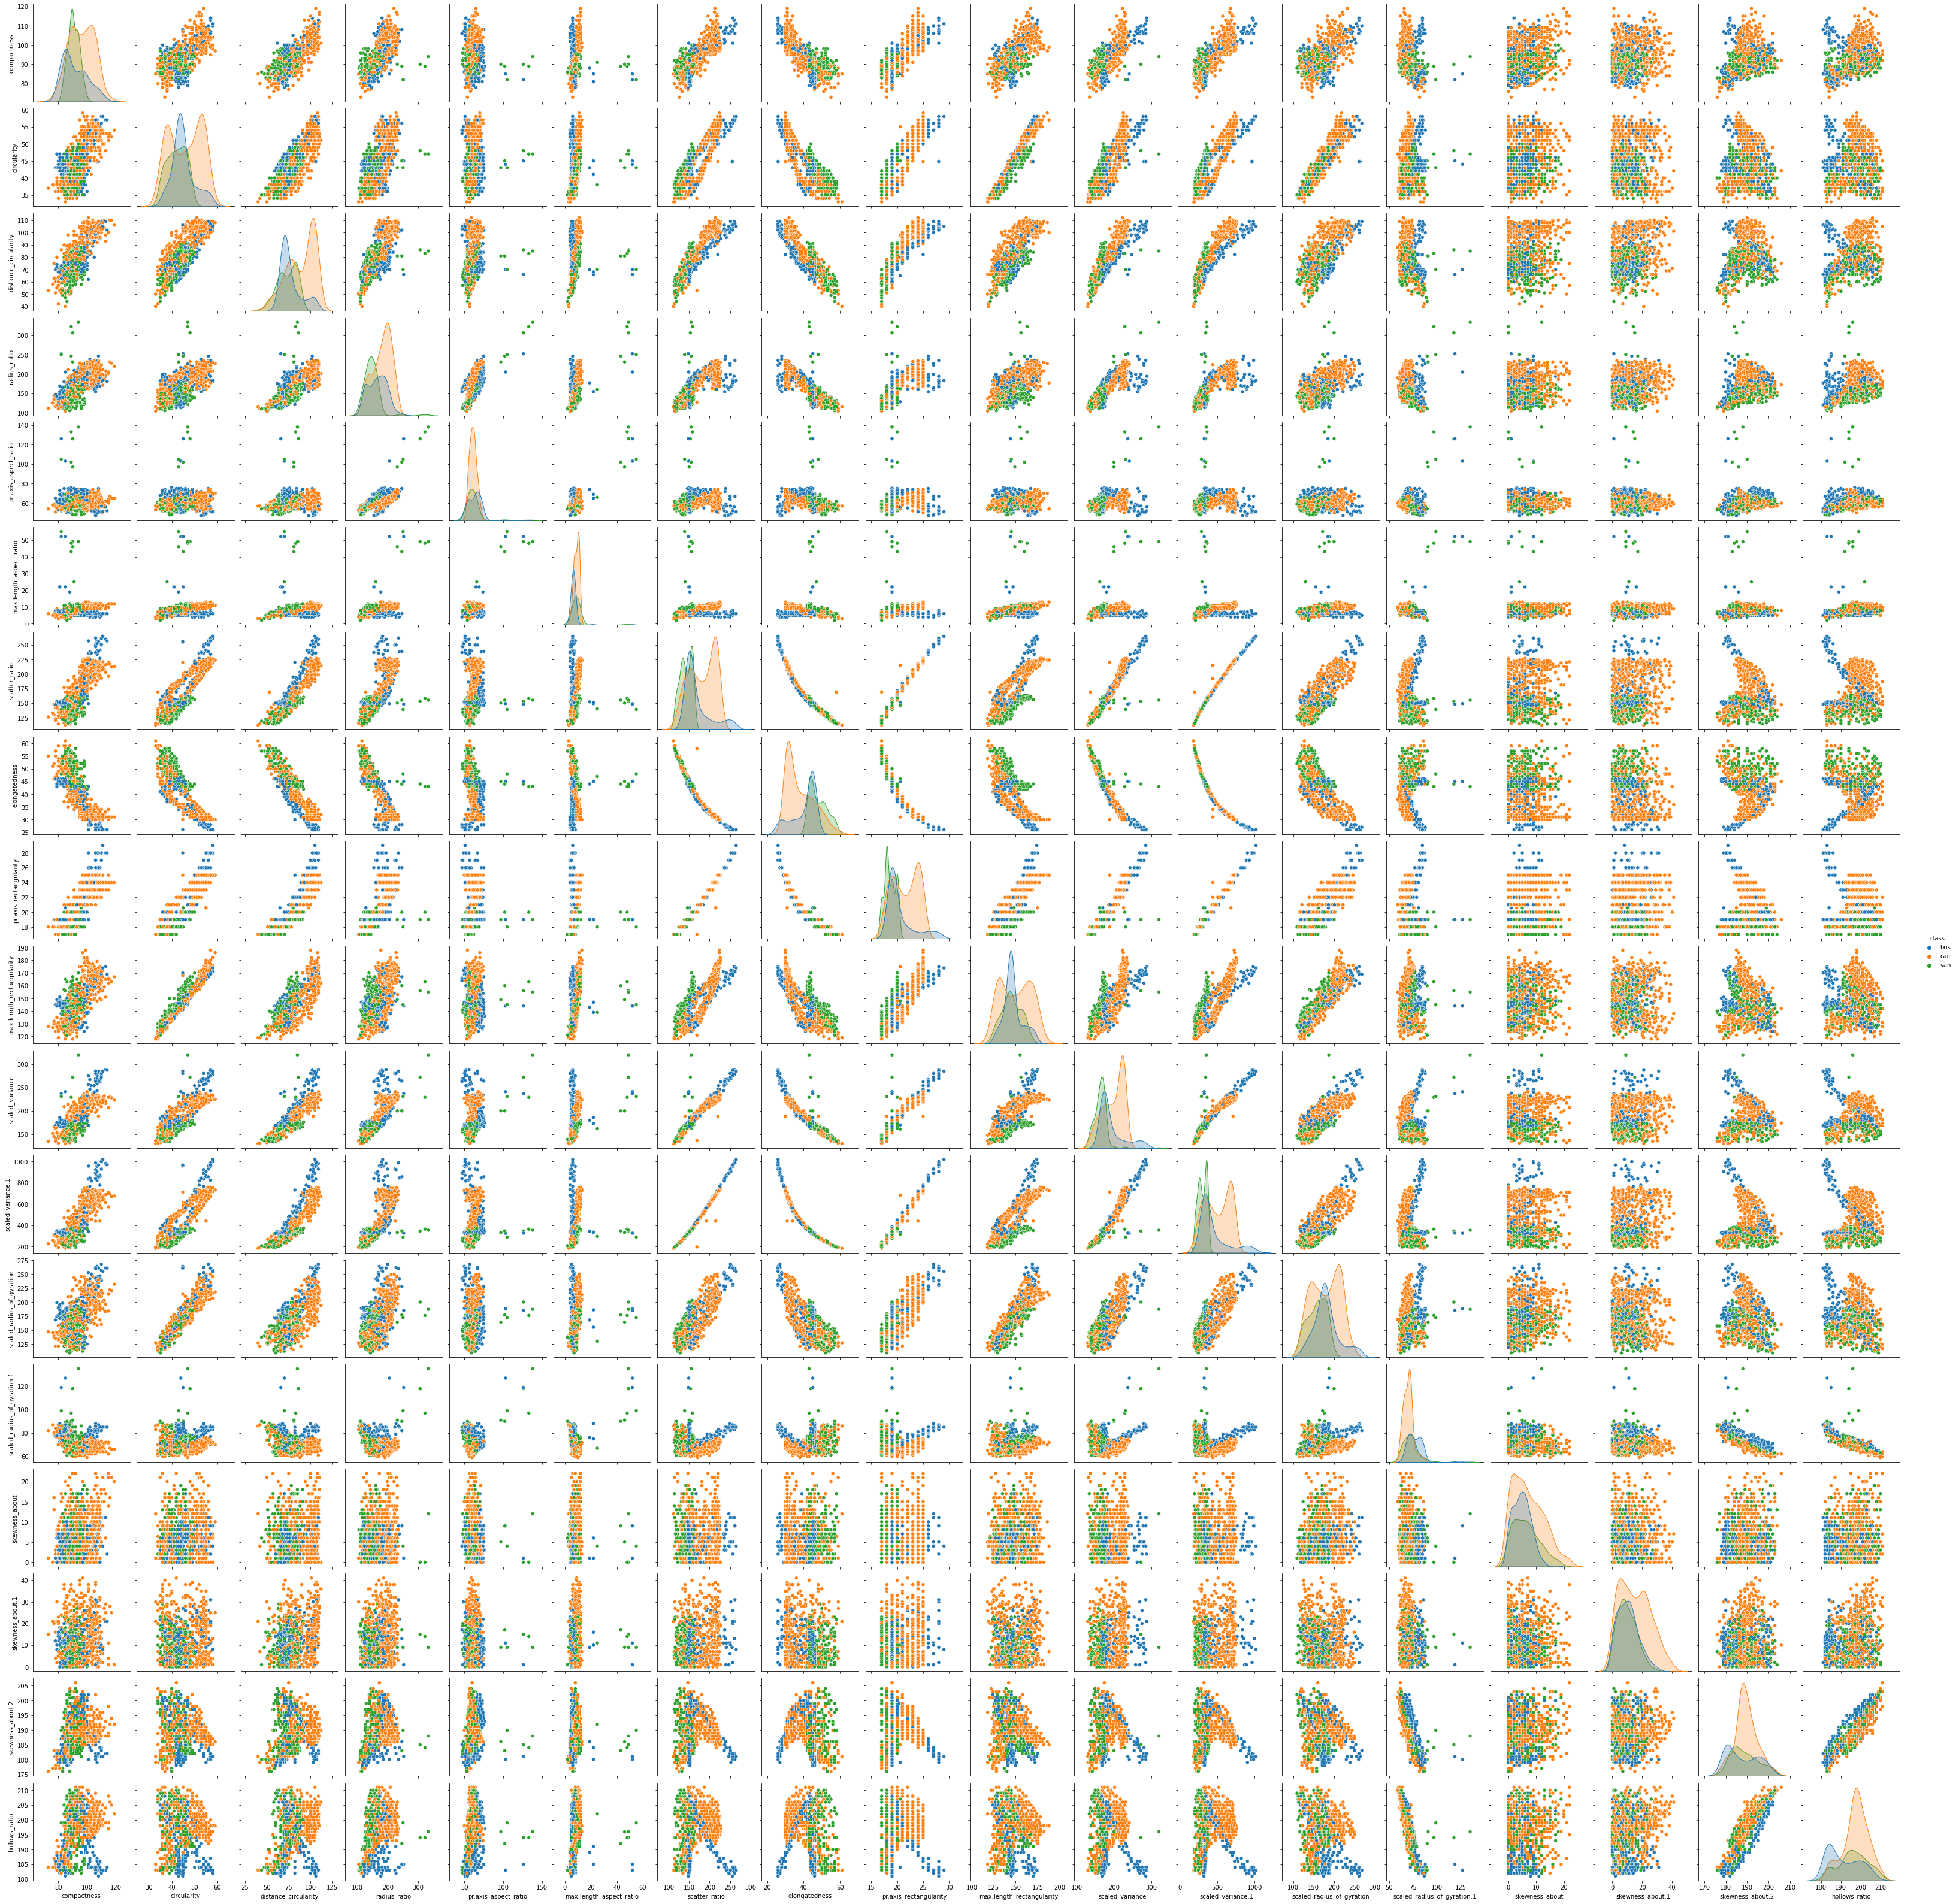

In [ ]:
sns.pairplot(vehicle_final, hue = 'class')

Because of high number of feature variables, the pair plot is a little hard to read. However we see that there are significant differences between the distribution of each variable across the three classes (diagonal graphs). Specially one of them is very different from the other two.

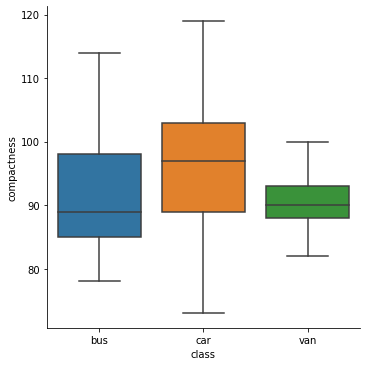

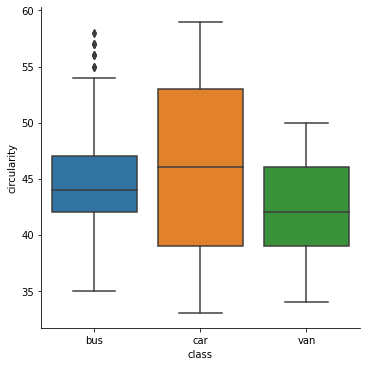

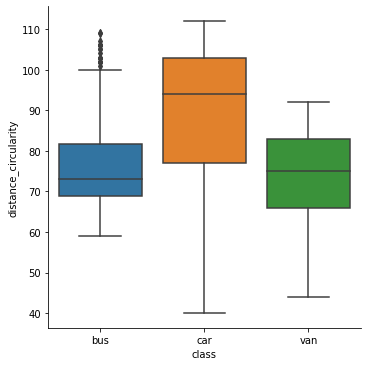

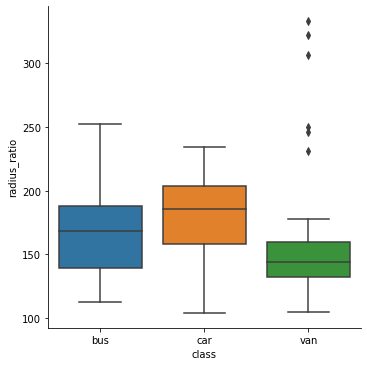

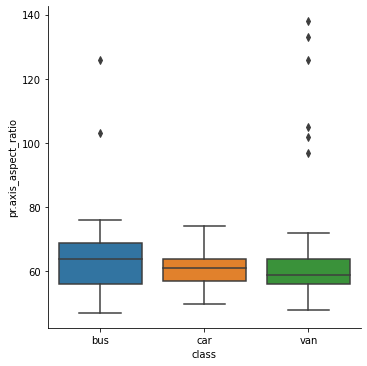

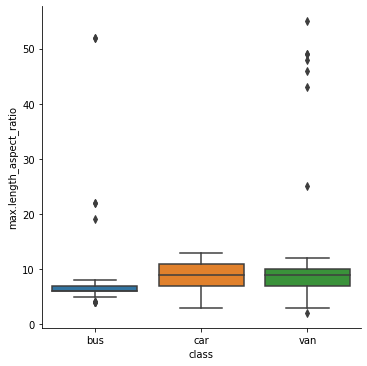

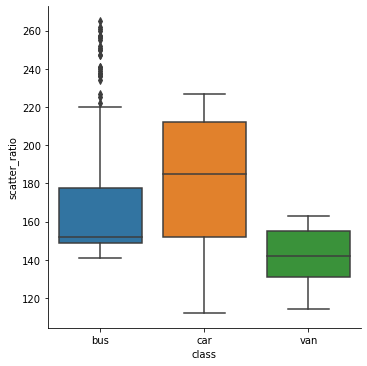

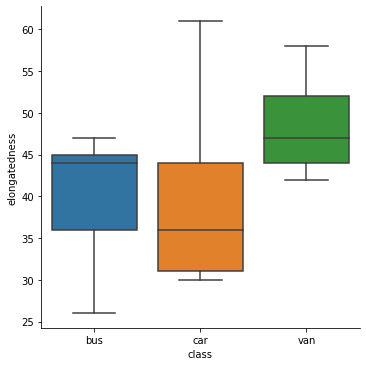

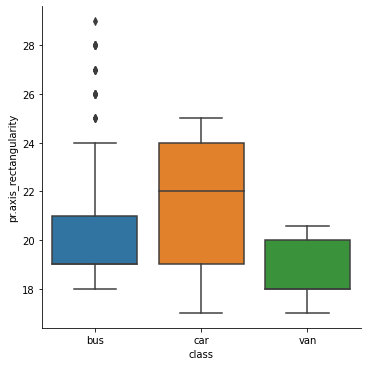

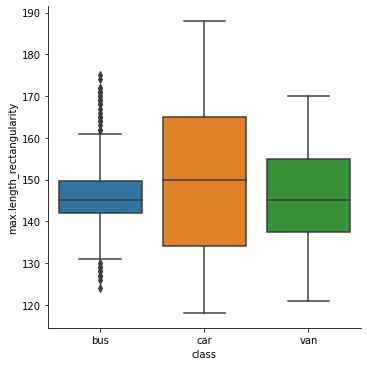

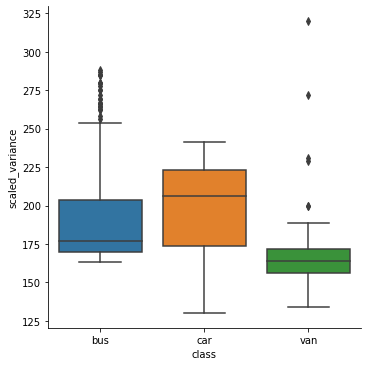

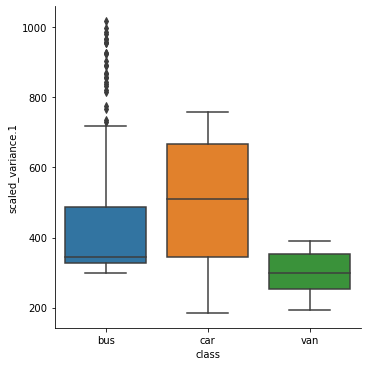

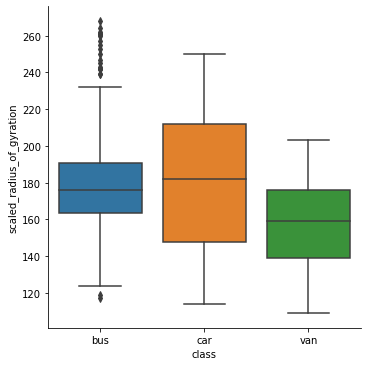

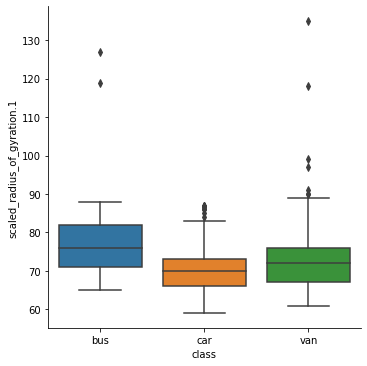

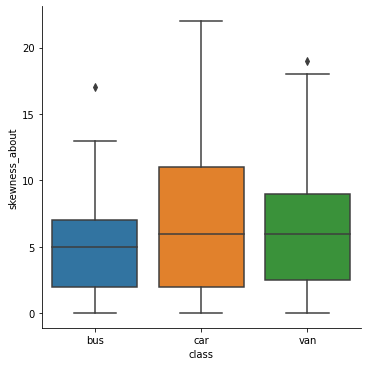

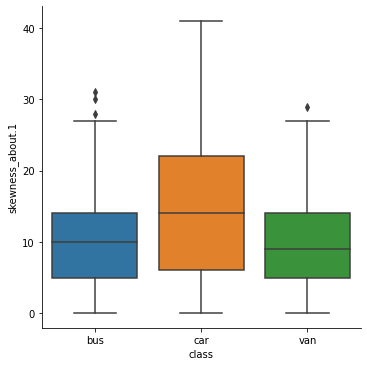

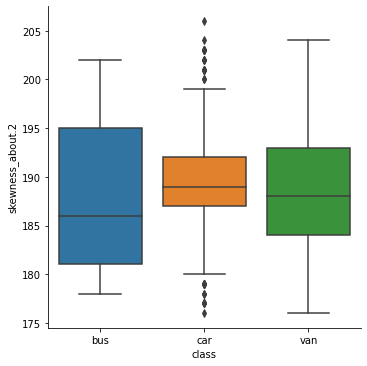

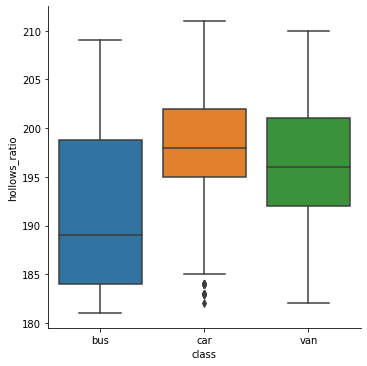

In [ ]:
for i in vehicle_final.columns:
    if vehicle_final[i].dtype == 'float64':
        sns.catplot(x="class",
               y = i,
               data=vehicle_final,
               kind="box",
               );

The above box plot clearly indicates which variables have very different distribution across the 3 classes (bus, car, van). Different distribution with minimum overlap indicates that the particular feature might be important in separating the classes.

In [ ]:
vehicle_final.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0          197.0   van  
1             189.0          199.0   van  
2             188.0          196.0   car  
3             199.0          207.0   van  
4             180.0          183.0   bus

In [ ]:
# Splitting test and train data
x = vehicle_final.drop(['class'], axis = 1)
y = vehicle_final['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(676, 18) (676,) (170, 18) (170,)


In [ ]:
# SVM Classifier
svm_clf = svm.SVC(gamma=0.001, C=3)
svm_clf.fit(x_train, y_train)
print('Train Score = ',svm_clf.score(x_train, y_train))
print('Test Score = ', svm_clf.score(x_test, y_test))

Train Score =  0.9985207100591716
Test Score =  0.9352941176470588


In [ ]:
y_predictions = svm_clf.predict(x_test)

In [ ]:
#Generating Classification report at default probability cutoff
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predictions))

Classification Report
              precision    recall  f1-score   support

         bus       0.97      0.84      0.90        37
         car       0.92      0.96      0.94        90
         van       0.93      0.98      0.95        43

    accuracy                           0.94       170
   macro avg       0.94      0.92      0.93       170
weighted avg       0.94      0.94      0.93       170



The model performance is very good on the test data. Weighted Average precision and recall is above 90%. Accuracy on test set is 94%.

Dimensional reduction: perform dimensional reduction on the data.

In [ ]:
# Scaling
x_scaled=x.apply(zscore)
x_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [ ]:
x_scaled.describe()

compactness   circularity  distance_circularity  radius_ratio  \
count  8.460000e+02  8.460000e+02          8.460000e+02  8.460000e+02   
mean   5.572112e-16 -1.984228e-16          3.564262e-16 -2.217821e-16   
std    1.000592e+00  1.000592e+00          1.000592e+00  1.000592e+00   
min   -2.512695e+00 -1.929554e+00         -2.676807e+00 -1.943850e+00   
25%   -8.115196e-01 -7.876877e-01         -7.698171e-01 -8.354423e-01   
50%   -8.244465e-02 -1.351929e-01         -1.341537e-01 -2.660463e-02   
75%    7.681428e-01  6.804256e-01          1.010040e+00  7.822331e-01   
max    3.076880e+00  2.311663e+00          1.899969e+00  4.916292e+00   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count          8.460000e+02             8.460000e+02   8.460000e+02   
mean          -3.639064e-16            -2.036721e-16  -6.010427e-16   
std            1.000592e+00             1.000592e+00   1.000592e+00   
min           -1.863407e+00            -1.428157e+00  -1.715171e+00   
25%           -5.939619e-01            -3.408453e-01  -6.601779e-01   
50%           -8.618388e-02            -1.233829e-01  -3.587513e-01   
75%            4.215941e-01             3.115419e-01   8.770981e-01   
max            9.688542e+00             1.009735e+01   2.896657e+00   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count   8.460000e+02            8.460000e+02               8.460000e+02   
mean   -7.726942e-16           -5.784708e-16               7.968409e-16   
std     1.000592e+00            1.000592e+00               1.000592e+00   
min    -1.912878e+00           -1.384896e+00              -2.067876e+00   
25%    -1.016240e+00           -6.117389e-01              -7.581695e-01   
50%     2.646712e-01           -2.251603e-01              -1.377823e-01   
75%     6.489446e-01            9.345756e-01               7.583325e-01   
max     2.570312e+00            3.254047e+00               2.757358e+00   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count     8.460000e+02       8.460000e+02               8.460000e+02   
mean     -1.847747e-16      -2.427793e-16               4.506508e-16   
std       1.000592e+00       1.000592e+00               1.000592e+00   
min      -1.871006e+00      -1.448762e+00              -2.020160e+00   
25%      -6.902804e-01      -6.875064e-01              -7.904120e-01   
50%      -3.073423e-01      -4.280841e-01              -2.181929e-02   
75%       9.052950e-01       8.350048e-01               7.160297e-01   
max       4.192180e+00       3.280379e+00               2.868089e+00   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                 8.460000e+02    8.460000e+02      8.460000e+02   
mean                  5.925126e-17    7.217762e-17     -4.606244e-17   
std                   1.000592e+00    1.000592e+00      1.000592e+00   
min                  -1.801672e+00   -1.298768e+00     -1.411949e+00   
25%                  -7.298657e-01   -8.906252e-01     -8.517569e-01   
50%                  -5.998678e-02   -7.434024e-02     -1.795266e-01   
75%                   3.419406e-01    5.378735e-01      7.167805e-01   
max                   8.380488e+00    3.190800e+00      3.181625e+00   

       skewness_about.2  hollows_ratio  
count      8.460000e+02   8.460000e+02  
mean      -1.293948e-15   1.544470e-15  
std        1.000592e+00   1.000592e+00  
min       -2.101239e+00  -1.968200e+00  
25%       -8.001144e-01  -7.239842e-01  
50%       -1.495523e-01   1.839573e-01  
75%        6.636504e-01   7.219967e-01  
max        2.777977e+00   2.067095e+00

In [ ]:
covMatrix = np.cov(x_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [ ]:
pca = PCA()
pca.fit(x_scaled)

PCA()

In [ ]:
x_scaled.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

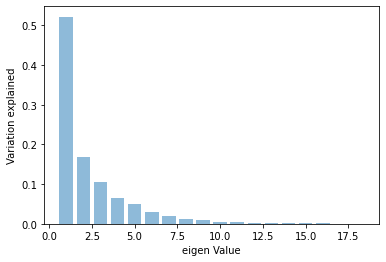

In [ ]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

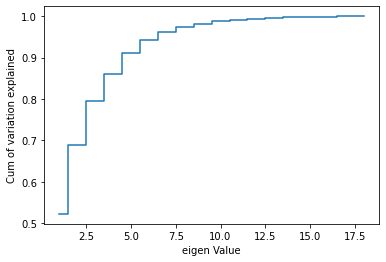

In [ ]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52206485, 0.68942539, 0.79504921, 0.86054241, 0.9114363 ,
       0.94136087, 0.96125769, 0.97355767, 0.98243806, 0.98752726,
       0.99122151, 0.99377159, 0.99573606, 0.99721818, 0.99834845,
       0.99931628, 0.99982865, 1.        ])

Thus with just 9 principal components (half as compared to original 18 variables) we can explain 98% of the variations in the data

# Dimentionality Reduction

In [ ]:
pca_9 = PCA(n_components=9)
pca_9.fit(x_scaled)
print(pca_9.components_)
print(pca_9.explained_variance_ratio_)
x_scaled_transformed = pd.DataFrame(pca_9.transform(x_scaled))

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

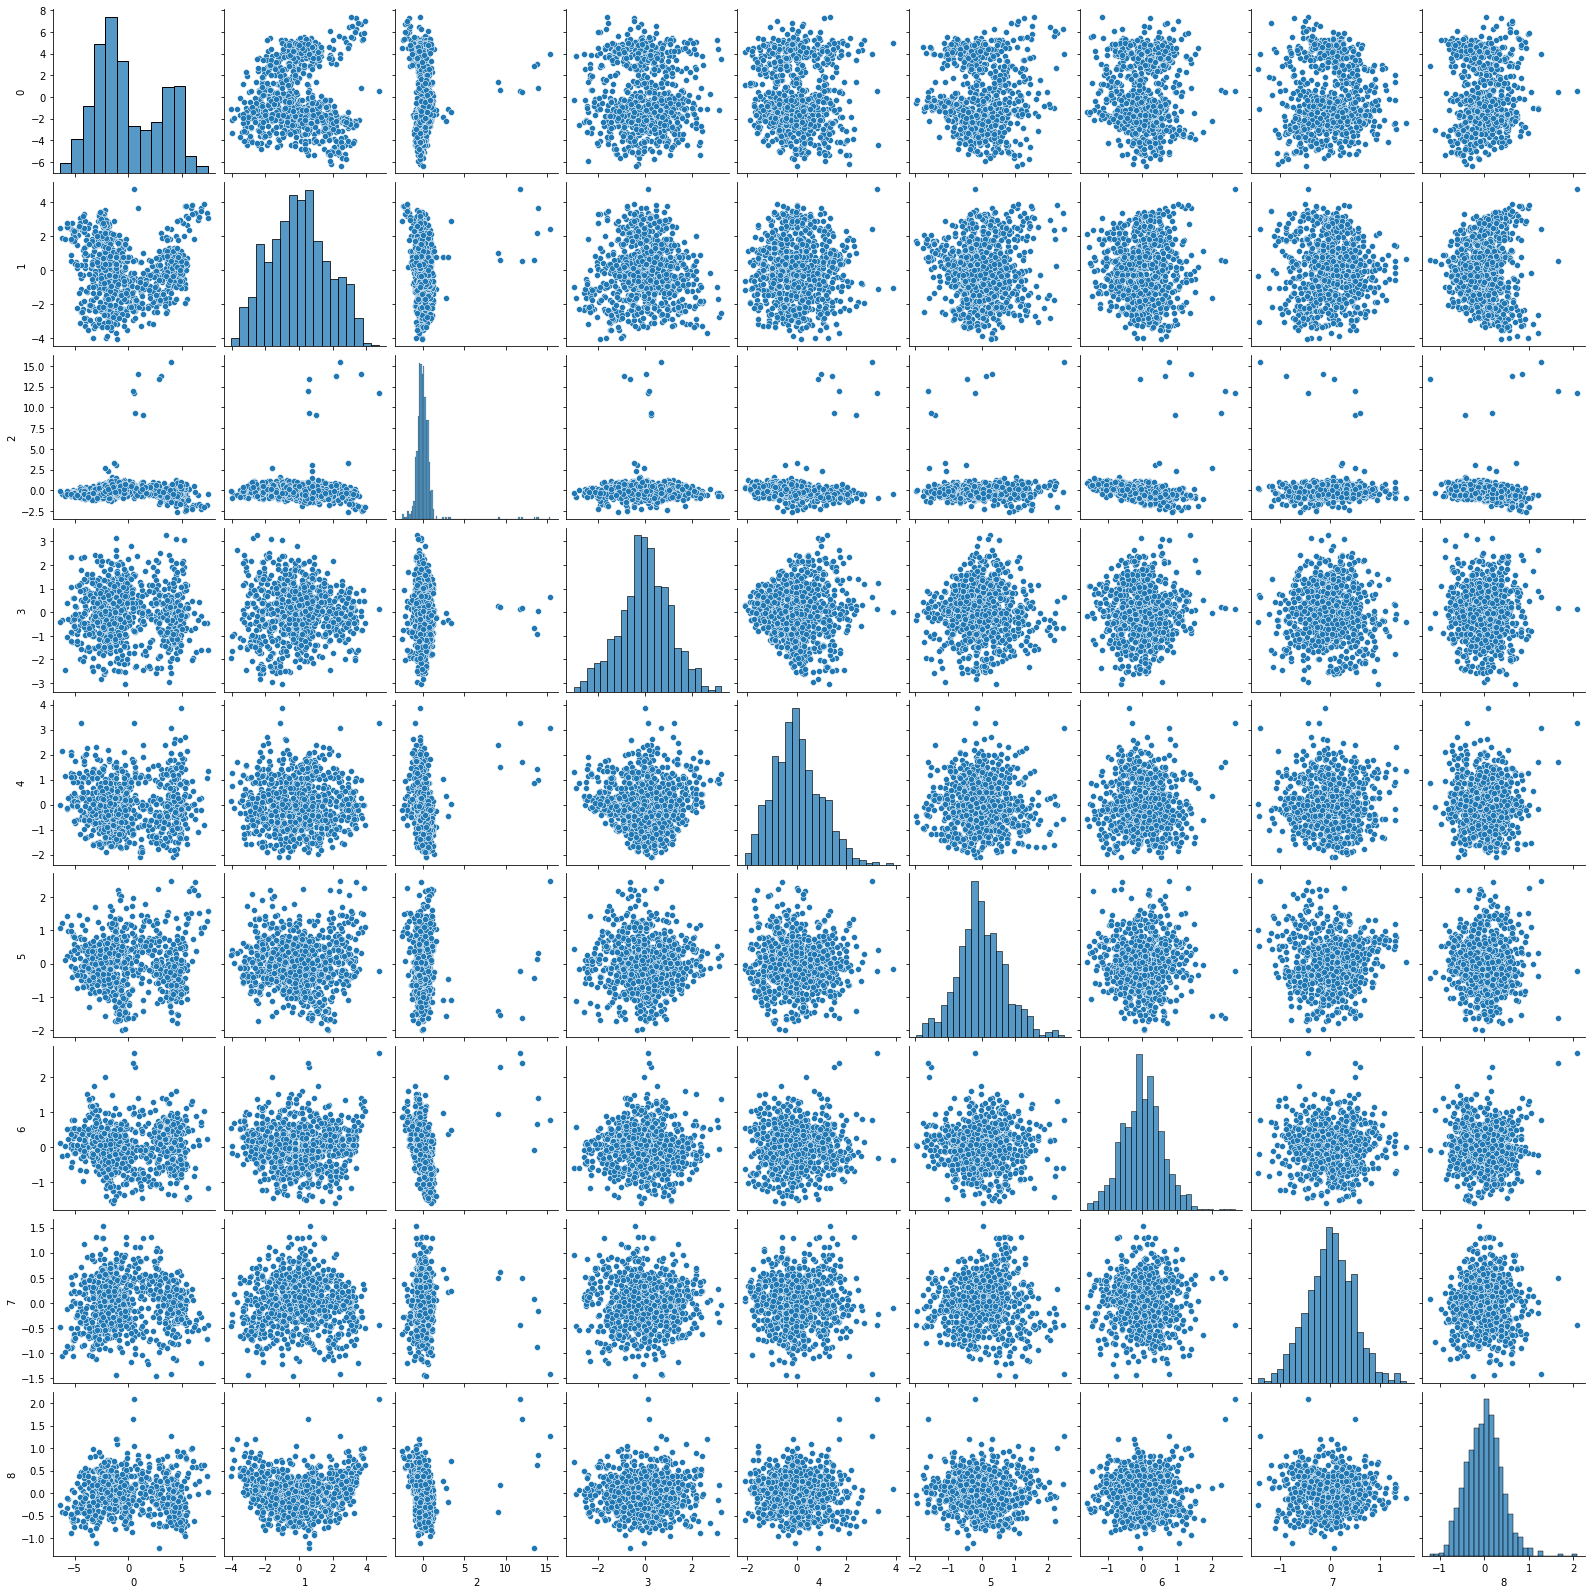

In [ ]:
sns.pairplot(x_scaled_transformed)

In [ ]:
x_scaled_transformed.head()

0         1          2         3         4         5         6  \
0  0.332393 -0.218638   1.001286  0.177328  0.079106 -0.754814 -0.902187   
1 -1.593741 -0.420549  -0.369264  0.233484  0.693397 -0.519073  0.376234   
2  3.767535  0.195041   0.088237  1.203129  0.730907  0.705377 -0.032642   
3 -1.740753 -2.829579   0.109176  0.377522 -0.363483 -0.487863  0.468613   
4  0.555239  4.757557  11.703588  0.145068  3.257651 -0.211649  2.671191   

          7         8  
0 -0.383358 -0.868964  
1  0.247624  0.146542  
2  0.483439 -0.308888  
3 -0.022129 -0.029270  
4 -0.446380  2.090488

The 18 variables feature space has been transformed into a feature space with 9 principal components that can explain 98% of data variations.

In [ ]:
# Splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x_scaled_transformed, y, test_size=0.2, random_state=1)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(676, 9) (676,) (170, 9) (170,)


In [ ]:
# SVM Classifier
svm_clf = svm.SVC(gamma=0.001, C=3)
svm_clf.fit(x_train, y_train)
print('Train Score = ',svm_clf.score(x_train, y_train))
print('Test Score = ', svm_clf.score(x_test, y_test))

Train Score =  0.8239644970414202
Test Score =  0.8411764705882353


In [ ]:
#Generating Classification report at default probability cutoff
y_predictions = svm_clf.predict(x_test)
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predictions))

Classification Report
              precision    recall  f1-score   support

         bus       0.81      0.68      0.74        37
         car       0.87      0.86      0.86        90
         van       0.82      0.95      0.88        43

    accuracy                           0.84       170
   macro avg       0.83      0.83      0.83       170
weighted avg       0.84      0.84      0.84       170



Although the model is not as accurate as the previous model with all 18 feature variables but here we are getting a good accuracy of 84 % with just half the number of principal components.

1. Significantly reduced the numbers of feature variables but still managed to capture 98% of variations in the data.
2. The SVM model with half the number of dimensions gave a good accuracy of 84% although it was lower than the original model with all 18 feature variables.
3. Lesser dimensions makes the feature space better manageable and sometimes helps in reducing curse of dimentionality.

# PART-IV

In [ ]:
sports_data = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [ ]:
sports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [ ]:
sports_data.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [ ]:
sports_data.isnull().any()

Name     True
Runs     True
Ave      True
SR       True
Fours    True
Sixes    True
HF       True
dtype: bool

In [ ]:
sports_data.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [ ]:
sports_data.shape

(180, 7)

In [ ]:
sports_data.loc[sports_data['Name'].isnull(),:].isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

Out of total 180 records, 90 records are completely empty and hence needs to be dropped from the analysis.

In [ ]:
sport_nonnull = sports_data.dropna().copy()

In [ ]:
sport_nonnull.shape

(90, 7)

In [ ]:
sport_nonnull.isnull().any()

Name     False
Runs     False
Ave      False
SR       False
Fours    False
Sixes    False
HF       False
dtype: bool

In [ ]:
sport_nonnull.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [ ]:
sports_pca = sport_nonnull.drop(['Name'], axis = 1)

In [ ]:
sports_pca.head()

Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [ ]:
sports_pca_scaled = sports_pca.apply(zscore)

In [ ]:
sports_pca_scaled.head()

Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

In [ ]:
pca = PCA()
pca.fit(sports_pca_scaled)

PCA()

# Eigen Value

In [ ]:
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


# Eigen Vectors

In [ ]:
print(pca.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


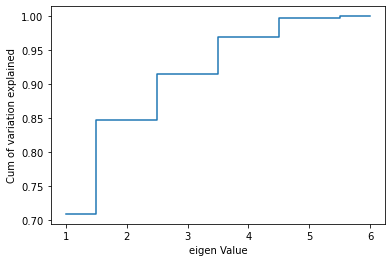

In [ ]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.70911996, 0.84696562, 0.91563695, 0.96988153, 0.99718777,
       1.        ])

Three Principal components can explain more than 90% variations in the data. Thus we will select 3 PCs.

In [ ]:
pca = PCA(n_components=3)
pca.fit(sports_pca_scaled)

PCA(n_components=3)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.70911996, 0.84696562, 0.91563695])

In [ ]:
sports_pca_3 = pd.DataFrame(pca.transform(sports_pca_scaled))

In [ ]:
sports_pca_3.head()

0         1         2
0  8.516774 -0.354575  3.672474
1  4.618340  1.476730 -0.503630
2  4.142251  0.471438 -0.557204
3  3.899411  0.041816  0.262143
4  4.120072  1.401002 -0.116643

In [ ]:
score = sports_pca_3.loc[:,0] + sports_pca_3.loc[:,1] + sports_pca_3.loc[:,2]

In [ ]:
sport_nonnull.reset_index(inplace = True)

In [ ]:
sport_nonnull['Scores'] = score

In [ ]:
sport_nonnull.head()

index       Name   Runs    Ave      SR  Fours  Sixes   HF     Scores
0      1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0  11.834673
1      3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0   5.591439
2      5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0   4.056485
3      7   CL White  479.0  43.54  149.68   41.0   20.0  5.0   4.203369
4      9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0   5.404430

In [ ]:
sport_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   90 non-null     int64  
 1   Name    90 non-null     object 
 2   Runs    90 non-null     float64
 3   Ave     90 non-null     float64
 4   SR      90 non-null     float64
 5   Fours   90 non-null     float64
 6   Sixes   90 non-null     float64
 7   HF      90 non-null     float64
 8   Scores  90 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ KB


In [ ]:
sport_nonnull.sort_values(by = 'Scores', ascending = False)

index            Name   Runs    Ave      SR  Fours  Sixes   HF     Scores
0       1        CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0  11.834673
1       3       G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0   5.591439
4       9        S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0   5.404430
5      11       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0   4.803812
7      15       RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0   4.487233
..    ...             ...    ...    ...     ...    ...    ...  ...        ...
77    155      DL Vettori   31.0   7.75  119.23    3.0    1.0  0.0  -2.673411
76    153  A Ashish Reddy   35.0   8.75  120.68    3.0    1.0  0.0  -2.702938
81    163        R Ashwin   18.0   6.00  120.00    2.0    0.0  0.0  -2.897966
72    145        R Bhatia   35.0  11.66  125.00    4.0    0.0  0.0  -2.929771
47     95       JA Morkel  107.0  15.28  157.35    5.0    6.0  0.0  -3.049379

[90 rows x 9 columns]

The players are sorted accoring to the scores (Highest to Lowest).

# PART-V

Dimension Reduction Techniques:

1. Principal Component Analysis (PCA)

2. Factor Analysis (FA)

3. Feature Selections Methods using Random Forest

4. Backward or Forward elimination of features

In [ ]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [ ]:
digits_data = pd.DataFrame(datasets.load_digits().data)

In [ ]:
digits_data.shape

(1797, 64)

In [ ]:
digits_data.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [ ]:
digits_data_target = pd.DataFrame(datasets.load_digits().target)

In [ ]:
digits_data_target.head()

0
0  0
1  1
2  2
3  3
4  4

In [ ]:
digits_data_target.shape

(1797, 1)

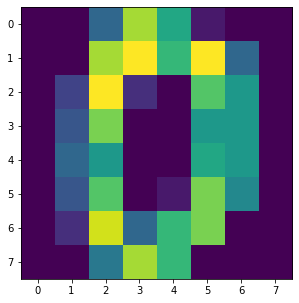

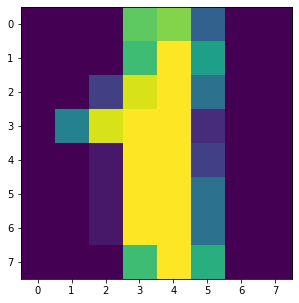

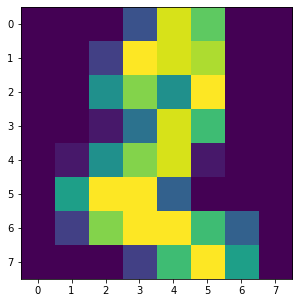

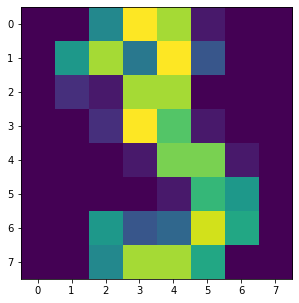

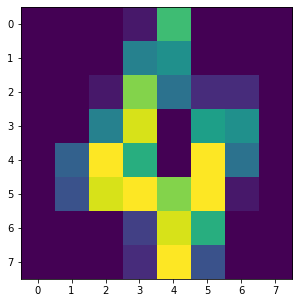

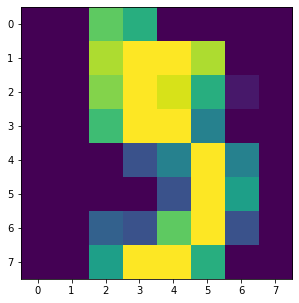

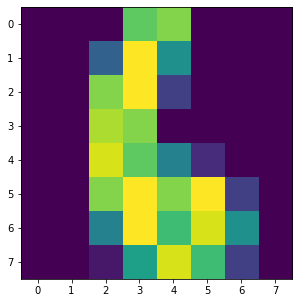

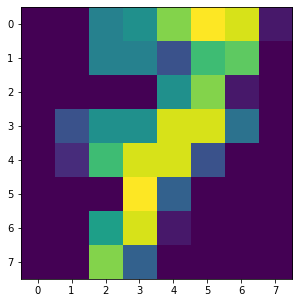

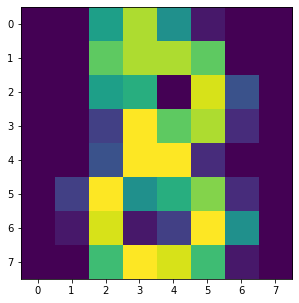

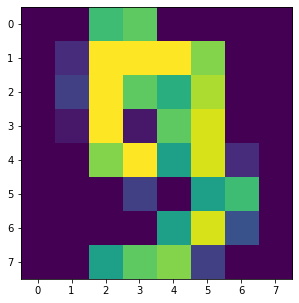

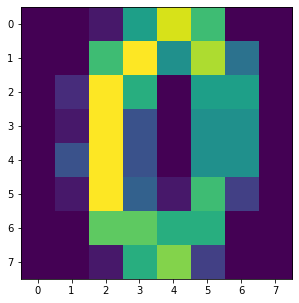

In [ ]:
# Code to display the first to image #
for i in range(0,11,1):
    digits_matrix = datasets.load_digits().data
    plt.figure(figsize=(5,5))
    plt.imshow(digits_matrix[i].reshape(8,8))
    plt.show()

In [ ]:
# test and train split
x = digits_data
y = np.ravel(digits_data_target)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=100)
# SVM Classifier
svm_clf = svm.SVC(gamma=0.001, C=3)
svm_clf.fit(x_train, y_train)
print('Train Score = ',svm_clf.score(x_train, y_train))
print('Test Score = ', svm_clf.score(x_test, y_test))
#Generating Classification report at default probability cutoff
y_predict = svm_clf.predict(x_test)
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predict))

Train Score =  1.0
Test Score =  0.9933333333333333
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        43
           6       1.00      0.98      0.99        47
           7       1.00      1.00      1.00        44
           8       0.97      0.95      0.96        41
           9       0.96      1.00      0.98        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



The SVM model has a very high accuracy on the digit dataset.

# Dimentionality Reduction (PCA)

In [ ]:
x.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [ ]:
x.describe()

0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

                54           55           56           57           58  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      3.725097     0.206455     0.000556     0.279354     5.557596   
std       4.919406     0.984401     0.023590     0.934302     5.103019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     0.000000     0.000000     0.000000     4.000000   
75%       7.000000     0.000000     0.000000     0.000000    10.000000   
max      16.000000    13.000000     1.000000     9.000000    16.000000   

                59           60           61           62           63  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     12.089037    11.809126     6.764051     2.067891     0.364496  
std       4.374694     4.933947     5.900623     4.090548     1.860122  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      11.000000    10.000000     0.000000     0.000000     0.000000  
50%      13.000000    14.000000     6.000000     0.000000     0.000000  
75%      16.000000    16.000000    12.000000     2.000000     0.000000  
max      16.000000    16.000000    16.000000    16.000000    16.000000  

[8 rows x 64 columns]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30]


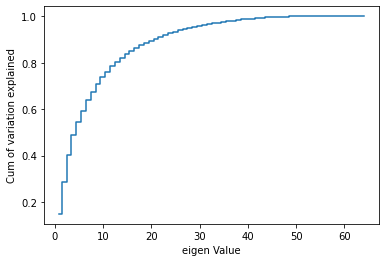

In [ ]:
pca = PCA()
pca.fit(x)
print(pca.explained_variance_)
plt.step(list(range(1,65)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

With 30 Principal Components we can capture approximately 96 % of variation in the data.

In [ ]:
# Selecting 30 Pricipal Components to get the final classification model
pca = PCA(n_components=30)
pca.fit(x)
print(np.cumsum(pca.explained_variance_ratio_))
x_top30 = pd.DataFrame(pca.transform(x))

[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524693 0.8943031  0.90319848 0.9111697  0.91884463 0.92607364
 0.93303252 0.9389933  0.94474914 0.94990062 0.9547951  0.95908341]


In [ ]:
# test and train split
y = np.ravel(digits_data_target)
x_train, x_test, y_train, y_test = train_test_split(x_top30, y, test_size=.25, random_state=100)
# SVM Classifier
svm_clf = svm.SVC(gamma=0.001, C=3)
svm_clf.fit(x_train, y_train)
print('Train Score = ',svm_clf.score(x_train, y_train))
print('Test Score = ', svm_clf.score(x_test, y_test))
#Generating Classification report at default probability cutoff
y_predict = svm_clf.predict(x_test)
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predict))

Train Score =  1.0
Test Score =  0.9911111111111112
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        39
           4       0.98      1.00      0.99        54
           5       1.00      0.98      0.99        43
           6       0.98      0.98      0.98        47
           7       1.00      1.00      1.00        44
           8       1.00      0.95      0.97        41
           9       0.96      1.00      0.98        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



With just 30 Principal Components we can as good a model as we got earlier with 64 feature varibales.